In [41]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import time
import statistics

import seaborn as sns
from scipy.stats import norm

In [43]:
#Import the Google (GOOG) stock data. 

ticker = 'GOOG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

data 

,GOOG
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298
...,...
2022-12-07,95.150002
2022-12-08,93.949997
2022-12-09,93.070000


<AxesSubplot:xlabel='Date'>

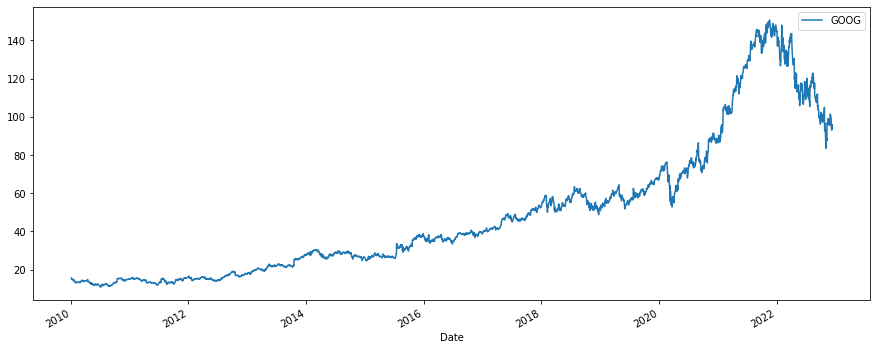

In [44]:
#Plot the Google (GOOG) stock data.
data.plot(figsize=(15,6)) 

Text(9.965555555555554, 0.5, 'Frequency')

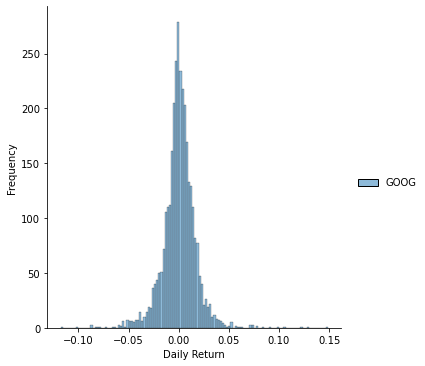

In [45]:
#Compute the logarithmic returns of Google stock
log_returns = np.log(1 + data.pct_change())

#Plot
sns.displot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [46]:
# Compute the Drift
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)

# Compute the Variance and Daily Returns

# we generate random variables for every day forecasted and 
# for every simulation trial we will run.
# 50 days, 1000 trials

stdev = log_returns.std()
days = 50
trials = 1000
Z = norm.ppf(np.random.rand(days, trials)) # days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [47]:
print(u) #mean value of stock price
print(var) #variance of the stock price
print(drift) #drift of stock price

GOOG    0.000557
dtype: float64
GOOG    0.000288
dtype: float64
GOOG    0.000413
dtype: float64


In [48]:
#Calculating the stock price for every trial
price_paths = np.zeros_like(daily_returns) 
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t] #stock price equation

In [49]:
daily_returns.shape #size of daily return

(50, 1000)

Text(0.5, 1.0, 'Histogram of last day price')

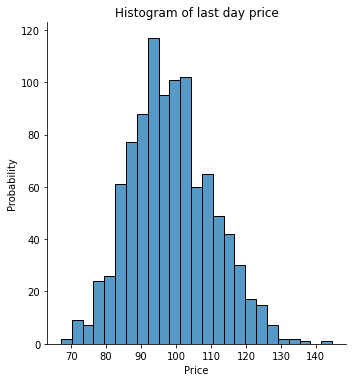

In [50]:
#Plot a histogram of the last day price
sns.displot(price_paths[49,:])
plt.xlabel("Price")
plt.ylabel("Probability")
plt.title('Histogram of last day price')

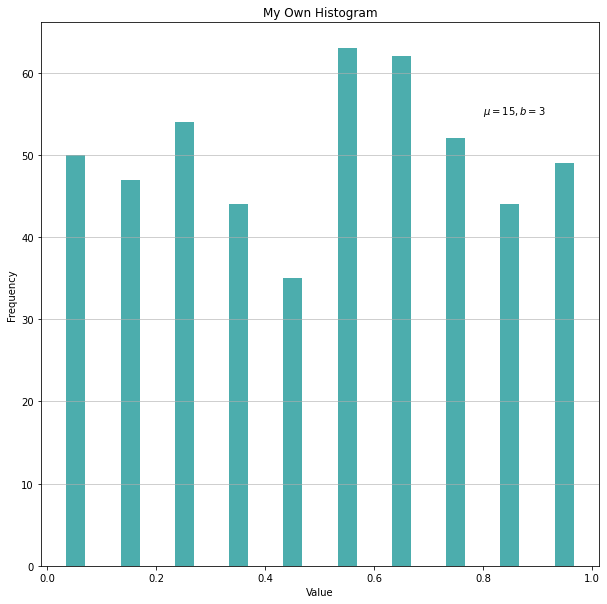

In [51]:
# draw histrogram with your own data

d = np.random.random([500])

fig1,ax1=plt.subplots(1,1,figsize=(10,10))
n, bins, patches = ax1.hist(x=d, bins='auto', color='darkcyan',alpha=0.7, rwidth=0.35)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Own Histogram')
plt.text(0.8, 55.0, '$\mu=15, b=3$')
maxfreq = n.max()

In [52]:
data.shape #size of the data

(3260, 1)

In [53]:
data.iloc[0,0]

15.610239028930664

In [54]:
#Finding mean and variance
u = log_returns.mean()
var = log_returns.var()

In [55]:
#printing mean and variance
print(u[0])
print(var[0])

0.0005568755466739742
0.00028834564489286325


In [56]:
# The last 50 daily return rates
last_50_returns = log_returns[-50:].T  

In [57]:
last_50_returns

Date,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-17,...,2022-11-30,2022-12-01,2022-12-02,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-12,2022-12-13
GOOG,0.030839,-0.001857,0.000196,-0.026462,-0.008675,-0.006709,0.002546,0.014242,-0.025701,0.036375,...,0.061068,-0.001677,-0.004453,-0.009567,-0.025968,-0.022447,-0.012692,-0.009411,0.005251,0.024182


In [64]:
def mymc(xk,Nsample,sigma,T):
    
    #s=0.1 # np.random.random([1]
    
    fxk = f(xk[0,:]) #current market price of the stock
    it = 0 #number of iterations
    while(it<Nsample-1):  #Nsample-1:- how many points to add
        ptadd = 0    #accept if zero, and reject if 1
        
        xadd = np.random.random([50])
        xadd = xadd*2 - 1
        xt = xk[it,:] + xadd * sigma
        
        fxt = f(xt)
        if(fxt>=fxk):
            xk[it+1,:] = xt
            ptadd = 1
        else:
            s=np.random.random([1])
            expf = np.exp(-(fxt -fxk)/T)
            if(expf<=s):
                xk[it+1,:] = xt
                ptadd = 1
        if(ptadd==1):
            it = it + 1
                
    return xk

In [87]:
sigma = var[0]
sigma

0.00028834564489286325

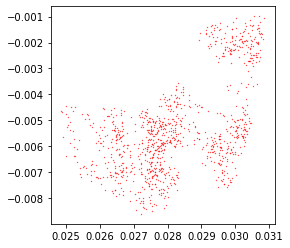

In [119]:
Nsample = 1000


sigma = var[0]  # = 0.00028834564489286325

T = 1.0

#mean_val = u[0]

xk = np.zeros([Nsample,50]) 
#xk[0,:] = [0,u[0]]
#xk[0,:] = [0,mean_val]
xk[0,:] = last_50_returns

xk=mymc(xk,Nsample,sigma,T)

fig1,ax1=plt.subplots(1,1,figsize=(4,4))
ax1.scatter(xk[:,0], xk[:,1],s=0.1,color='r')
#plt.xlim([-10,10])
#plt.ylim([-10,10])
plt.show()

In [97]:
xk.shape #size of shape

(1000, 50)

In [98]:
Z = xk.T
Z.shape

(50, 1000)

In [91]:
daily_returns = np.exp(drift.values + stdev.values * Z) #Compute Daily Returns

In [92]:
#Calculating the stock price for every trial

price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t] #stock price equation

Text(0.5, 1.0, 'Histogram of last 50 day price')

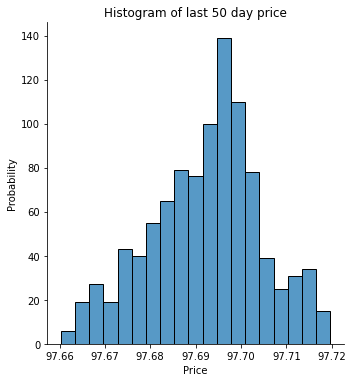

In [124]:
#Plot a histogram of the last day price
sns.displot(price_paths[49,:])
plt.xlabel("Price")
plt.ylabel("Probability")
plt.title('Histogram of last 50 day price')